In [190]:
import numpy as np
import matplotlib.pyplot as plt
import NN_resorces.Dataset as dt
import cv2

In [191]:
dataset = dt.FramesDataset(".\dataset2")
len = dataset.__len__()
rand = np.random.randint(0, len)
frame1, frame2, frame3 = dataset.__getitem__(rand)

c:\Users\Mau\Desktop\proyectos\Proyecti_Final
1997


In [192]:
Frame1gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
Frame2gray = cv2.cvtColor(frame3, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
flow = cv2.calcOpticalFlowFarneback(Frame1gray, Frame2gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow2 = flow
h, w = flow.shape[:2]
flow = -flow
flow[:,:,0] += np.arange(w)
flow[:,:,1] += np.arange(h)[:,np.newaxis]
newFrame = cv2.remap(frame1, flow,None, cv2.INTER_LINEAR)

In [193]:
hsv = np.zeros(frame1.shape, dtype=np.uint8)
hsv[..., 1] = 0
mag, ang = cv2.cartToPolar(flow2[..., 0], flow2[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

Text(0.5, 1.0, 'Fotograma 2')

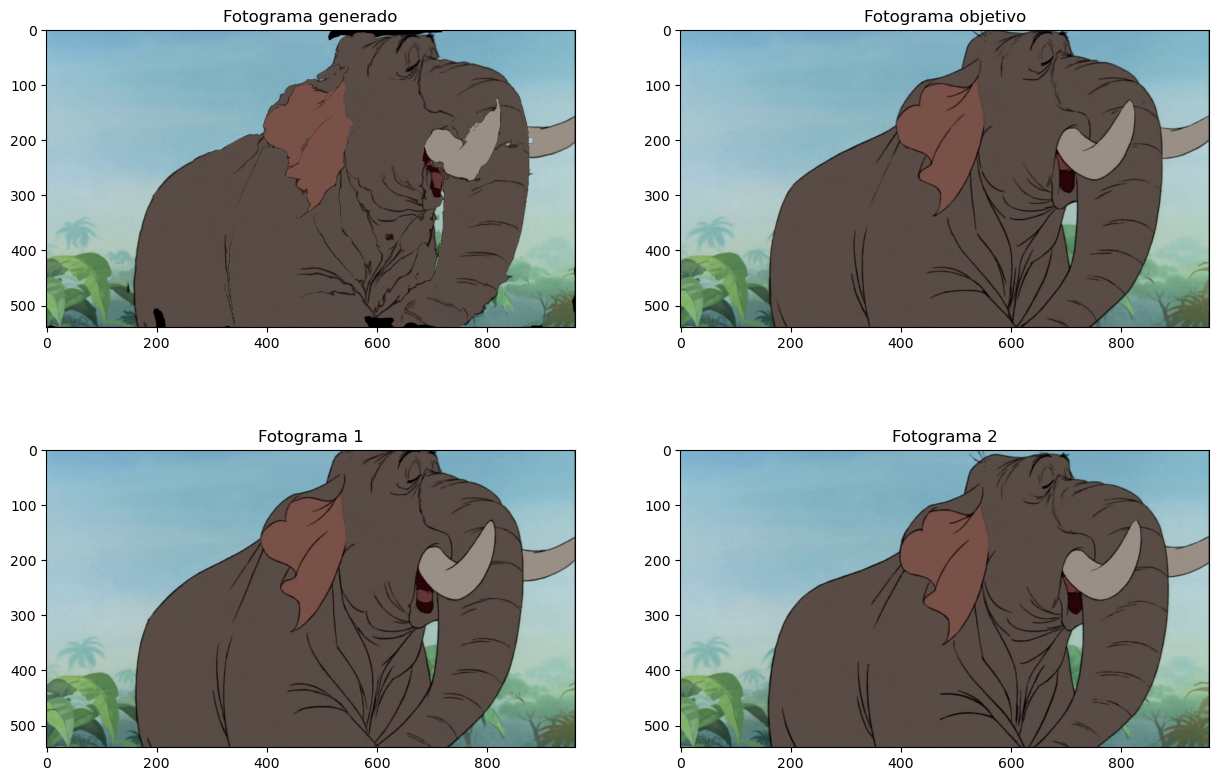

In [194]:
fNew = cv2.cvtColor(newFrame, cv2.COLOR_BGR2RGB)
f1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
f2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
f3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.title("Fotograma generado")
plt.imshow(fNew)
fig.add_subplot(2, 2, 2)
plt.imshow(f2)
plt.title("Fotograma objetivo")
fig.add_subplot(2, 2, 3)
plt.imshow(f1)
plt.title("Fotograma 1")
fig.add_subplot(2, 2, 4)
plt.imshow(f3)
plt.title("Fotograma 2")

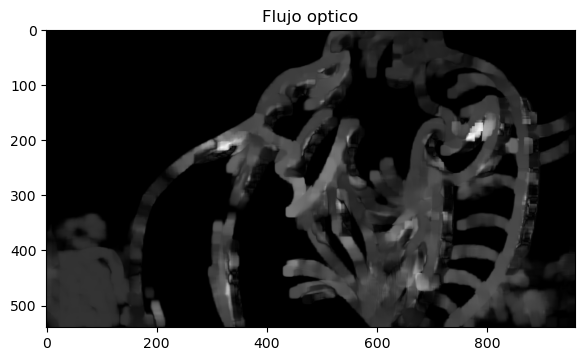

In [195]:
fig2 = plt.figure(figsize=(15, 10))
fig2.add_subplot(2, 2, 1)
plt.title("Flujo optico")
plt.imshow(bgr)